<a href="https://colab.research.google.com/github/Mahalete/ArtificialNeuralNetwork/blob/master/Covid19_EDA_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These datasets on Novel Covid-19 are taken from Kaggle https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset. 
Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. 
This is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

### **Purpose**

The objective of this notebook is to study COVID-19 outbreak with some basic EDA visualizations. Comparison of Finland where the COVID-19 hasn't been so dramatic with the west of the world. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days.

### **Importing the Dataset**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import pandas as pd

In [ ]:
confirmed_df = pd.read_csv('/content/sample_data/time_series_covid_19_confirmed.csv')
deaths_df =  pd.read_csv('/content/sample_data/time_series_covid_19_deaths.csv')
recovered_df=  pd.read_csv('/content/sample_data/time_series_covid_19_recovered.csv')
country_cases_df = pd.read_csv('/content/sample_data/covid_19_country_data.csv')


In [59]:
print(confirmed_df.shape)
print(deaths_df.shape)
print(recovered_df.shape)
print(country_cases_df.shape)

(266, 240)
(266, 240)
(253, 240)
(109382, 8)


In [60]:
country_cases_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20',
       '9/11/20', '9/12/20', '9/13/20'],
      dtype='object', length=240)

In [73]:
global_data = country_cases_df.copy().drop(['SNo', 'ObservationDate', 'Province/State', 'Country/Region','Last Update'], axis=1)
a= pd.DataFrame((global_data.sum()))
global_summery = a.astype('int')

In [86]:
#confirmed_global = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
#deaths_global = deaths_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
#recovered_global = recovered_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
#print(confirmed_global)
#print(deaths_global)
global_data_Confirmed = country_cases_df.copy().drop(['SNo', 'Province/State', 'Country/Region','Last Update'], axis=1).groupby('ObservationDate').agg('sum')
#global_data_Confirmed = country_cases_df.copy().drop(['SNo', 'Province/State', 'Country/Region','Last Update'], axis=1).groupby('ObservationDate').agg({'Confirmed':['sum']})
global_summery = pd.DataFrame(global_data_Confirmed)
global_summery

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0
...,...,...,...
09/09/2020,27863733.0,903686.0,18776723.0
09/10/2020,28161885.0,909479.0,18992383.0
09/11/2020,28481413.0,915356.0,19215800.0


In [92]:
 global_summery.iloc[-1]

Confirmed    28902753.0
Deaths         922737.0
Recovered    19547423.0
Name: 09/13/2020, dtype: float64

The below graph shows the spread of the Covid-19 over a period of time

In [93]:
confirmed_agg_res = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()


In [94]:
import plotly.graph_objects as go

In [96]:
fig1= go.Figure()
fig1.add_trace(go.Scatter(x= confirmed_agg_res.index, y = confirmed_agg_res .values, mode='lines+markers',name='Confirmed Cases'))
fig1.update_layout(title='Total (Global)Covid-19 Confirmed Cases',
                   xaxis_tickangle = 300,
                   yaxis_title='Cases in Numbers')
fig1.show()

In [97]:
confirmed_agg = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
deaths_agg = deaths_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
recovered_agg = recovered_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
#Calculate active cases agg
active_agg=pd.Series(data =np.array([x1 - x2 - x3 for (x1, x2, x3) in zip(confirmed_agg.values, deaths_agg.values, recovered_agg.values)]),
index = confirmed_agg.index)


In [98]:
fig2= go.Figure()
fig2.add_trace(go.Scatter(x= confirmed_agg.index, y = confirmed_agg .values, mode='lines',name='Confirmed'))
fig2.add_trace(go.Scatter(x= deaths_agg.index, y = deaths_agg .values, mode='lines',name='Deaths'))
fig2.add_trace(go.Scatter(x= recovered_agg.index, y = recovered_agg .values, mode='lines',name='Recovered'))
fig2.add_trace(go.Scatter(x= active_agg.index, y = active_agg .values, mode='lines', name='Active'))
fig2.update_layout(title='Covid-19 Case Status, through time',
                   xaxis_title='Date',
                   yaxis_title='Cases in Numbers')
fig2.show()


#CHECK **LATER**

In [ ]:
#country_cases_df.copy().drop(['SNo', 'ObservationDate', 'Province/State','Last Update'], axis=1).sort_values('Confirmed', ascending = False).reset_index(drop=True).style.bar(align='left', width = 100, color ='#d65f5f')

### **Data Modelling and Prediction**

Usually in order to mesure the spread of infectious deseses such as Covid-19 , SARs, etc compartmental model techniques are normally used . There are infact many such models to choose from, but for the purpose of this task and after a suggetion from Bhuwan , I choose to use the SIR Model.   


We will need to use defferential equation to calculate the population change over time. 

Important likns to understand and impliment the equation:

- https://www.youtube.com/watch?v=NKMHhm2Zbkw&ab_channel=TomRocksMaths
- https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

The SIR epidemic model
A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.
The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

dSdtdIdtdRdt=−βSIN,=βSIN−γI,=γI.

In [ ]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

### Sample example to check the SIR Model
In the biggining I start to model the population , Having a 1000 people and 1 infected person.

***Effective contact rate ***= (transmission rate * contact rate)
Example:5% transmission rate with 5 contacts in a day is 0.05*5 = 0.25.

***Recovery rate *** = 1/days.
so if the days to recover is 10 days  the it is 1/10=0.1

In [99]:
from scipy.integrate import odeint

R0 is  3.5


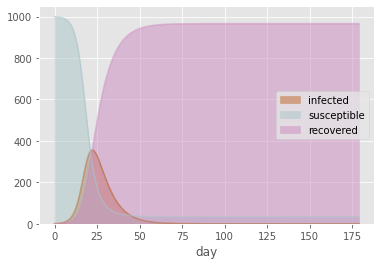

In [101]:
effective_contact_rate = 0.5
recovery_rate = 1/7

print("R0 is ", effective_contact_rate / recovery_rate)
# In our population , everyone which is not infected is susceptible
total_pop = 1000
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered
# A list of days
days = range(0, 180)
# Use differential, equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args = (total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe 
df = pd.DataFrame({'susceptible': S,
                   'infected': I,
                   'recovered': R,
                   'day' : days
})
plt.style.use('ggplot')
df.plot(x = 'day',
        y = ['infected', 'susceptible', 'recovered'],
        color = ['#bb6424', '#aac6ca', '#cc8ac0'],
        kind = 'area',
        stacked = False)



### Prediction for Finland using the SIR Model

In [105]:
global_data2 = country_cases_df.copy().drop(['SNo','Province/State', 'Last Update'], axis=1)

In [106]:
global_data2.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0


Confirmed  sum    8580.0
Deaths     sum     337.0
Recovered  sum    7500.0
Name: 09/13/2020, dtype: float64


Text(0.5, 0, 'Date')

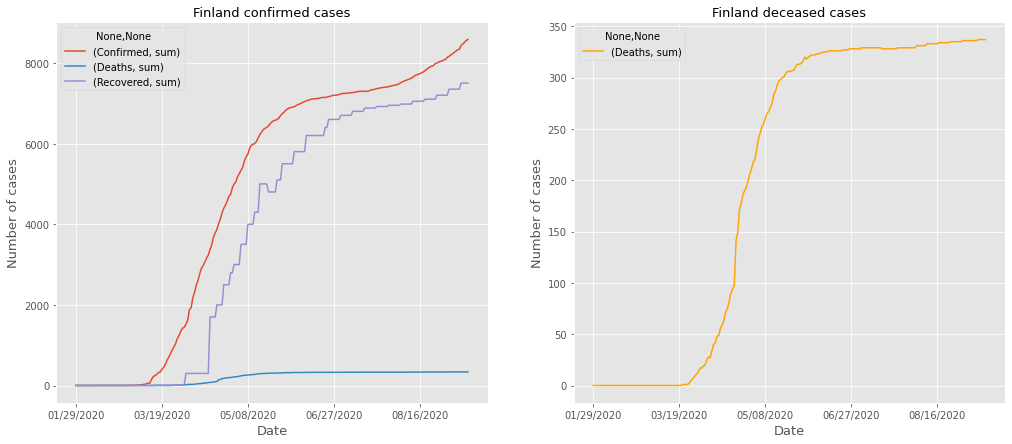

In [110]:
confirmed_total_date_Finland = global_data2[global_data2['Country/Region']=='Finland'].groupby(['ObservationDate']).agg({'Confirmed':['sum']})
deaths_total_date_Finland = global_data2[global_data2['Country/Region']=='Finland'].groupby(['ObservationDate']).agg({'Deaths':['sum']})
recovered_total_date_Finland = global_data2[global_data2['Country/Region']=='Finland'].groupby(['ObservationDate']).agg({'Recovered':['sum']})
total_date_Finland= confirmed_total_date_Finland.join(deaths_total_date_Finland).join(recovered_total_date_Finland)
print(total_date_Finland.iloc[-1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_Finland.plot(ax=ax1)
ax1.set_title("Finland confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
deaths_total_date_Finland.plot(ax=ax2, color='orange')
ax2.set_title("Finland deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

### SIR Model Prediction Finland Specific

In [ ]:
population_Finland = 5,532,333


R0 is  2.1


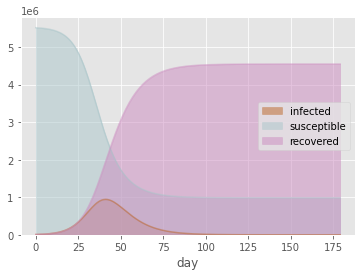

In [112]:
effective_contact_rate = 0.3
recovery_rate = 1/7

print("R0 is ", effective_contact_rate / recovery_rate)
# In our population , everyone which is not infected is susceptible
total_pop = 5532333
recovered = 7500.0
infected =  8580.0
susceptible = total_pop - infected - recovered
# A list of days
days = range(0, 180)
# Use differential, equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args = (total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe 
df = pd.DataFrame({'susceptible': S,
                   'infected': I,
                   'recovered': R,
                   'day' : days
})
plt.style.use('ggplot')
df.plot(x = 'day',
        y = ['infected', 'susceptible', 'recovered'],
        color = ['#bb6424', '#aac6ca', '#cc8ac0'],
        kind = 'area',
        stacked = False)
